# Exploratory Data Analysis

## Operational

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load the file into a DataFrame
file_path = '..\data\IndexData.csv'
df = pd.read_csv(file_path)

# EDA Visualizations

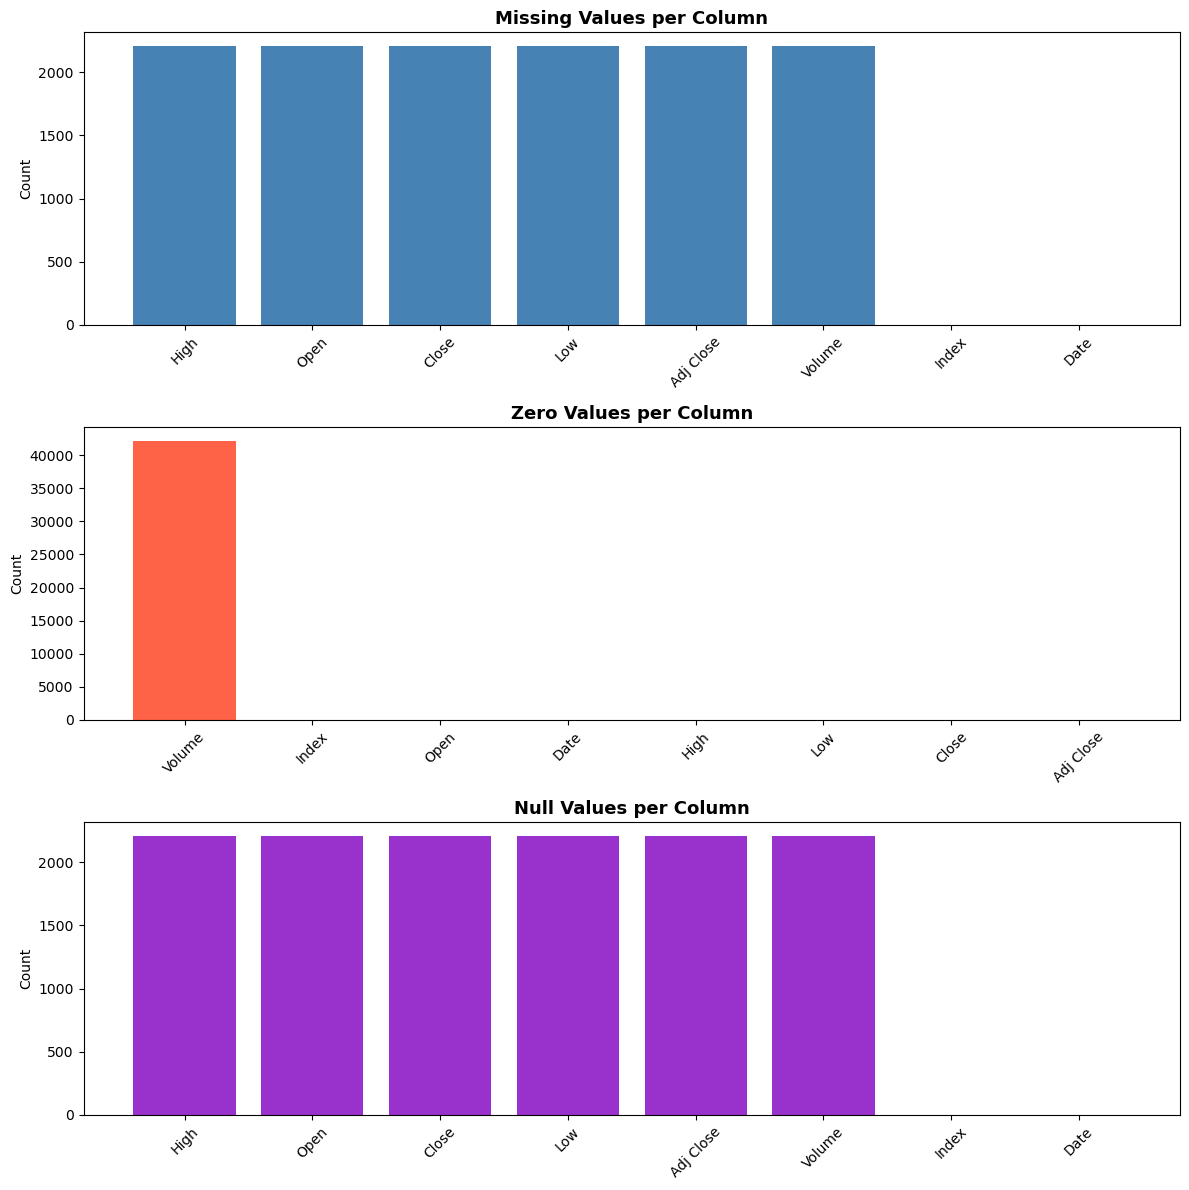

In [ ]:
# Create a 3-row figure
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

# Missing values (NaN)
missing_counts = df.isna().sum().sort_values(ascending=False)
axes[0].bar(missing_counts.index, missing_counts.values, color='steelblue')
axes[0].set_title('Missing Values per Column', fontsize=13, weight='bold')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Zero values
zero_counts = (df == 0).sum().sort_values(ascending=False)
axes[1].bar(zero_counts.index, zero_counts.values, color='tomato')
axes[1].set_title('Zero Values per Column', fontsize=13, weight='bold')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Null values (explicit check for None)
null_counts = df.isnull().sum().sort_values(ascending=False)
axes[2].bar(null_counts.index, null_counts.values, color='darkorchid')
axes[2].set_title('Null Values per Column', fontsize=13, weight='bold')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Visualization

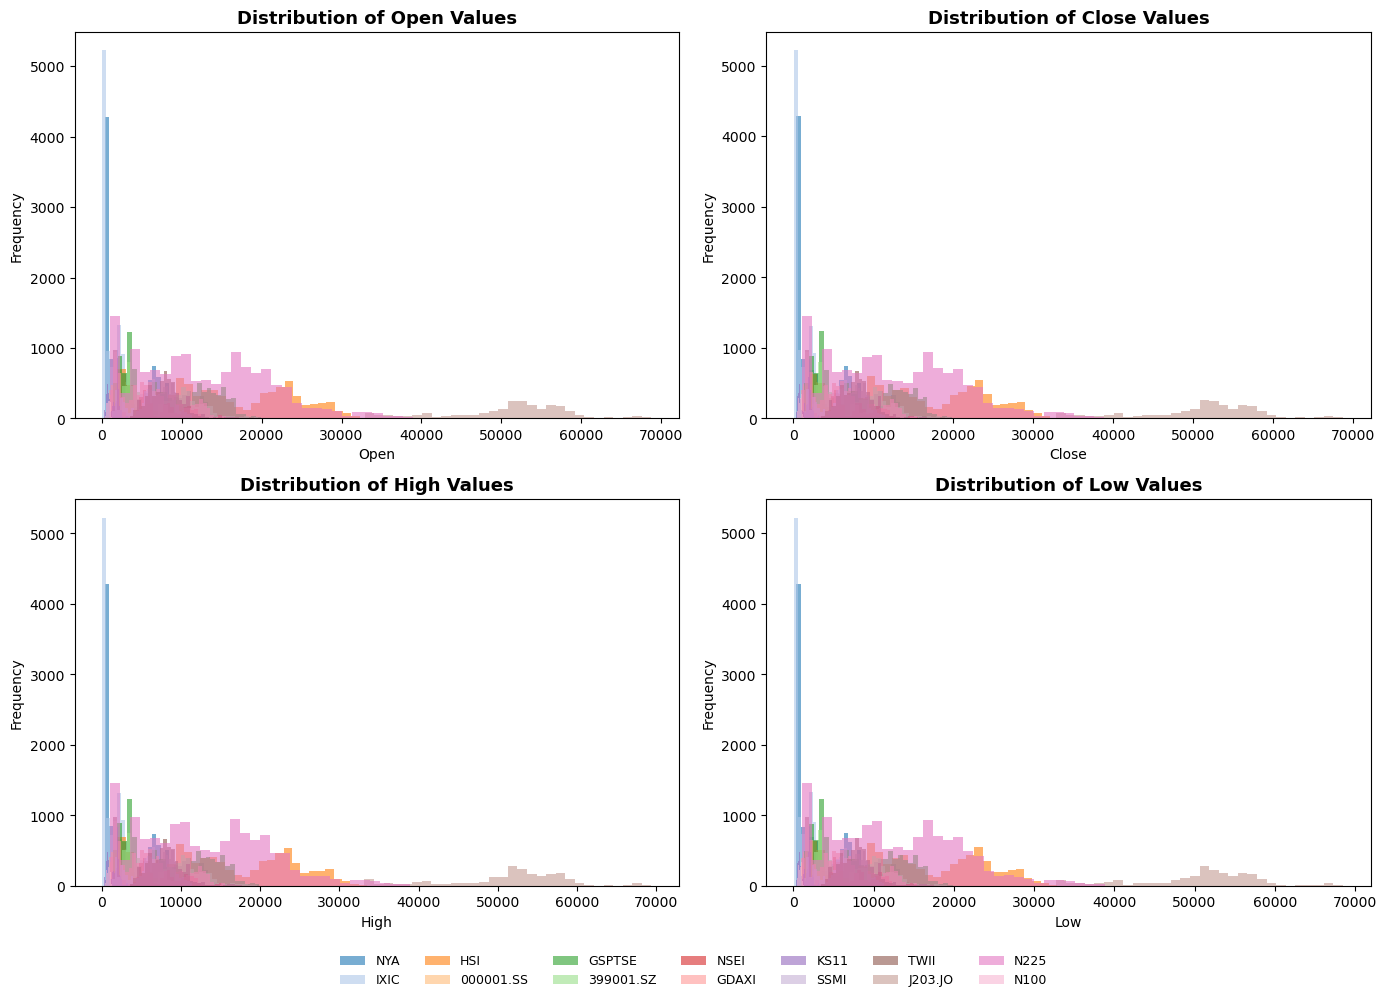

In [20]:
# Visualization Initialization
index_col = 'Index' 
unique_indices = df[index_col].unique()

# Generate a distinct color for each index (14 total)
colors = sns.color_palette("tab20", len(unique_indices))
color_map = dict(zip(unique_indices, colors))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
columns = ['Open', 'Close', 'High', 'Low']

for ax, col in zip(axes, columns):
    for idx in unique_indices:
        subset = df[df[index_col] == idx]
        ax.hist(subset[col].dropna(), bins=30, color=color_map[idx], alpha=0.6, label=idx)
    ax.set_title(f'Distribution of {col} Values', fontsize=13, weight='bold')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')

# Add a single legend below all subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=7, frameon=False, fontsize=9)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # gap to fit legend
plt.show()


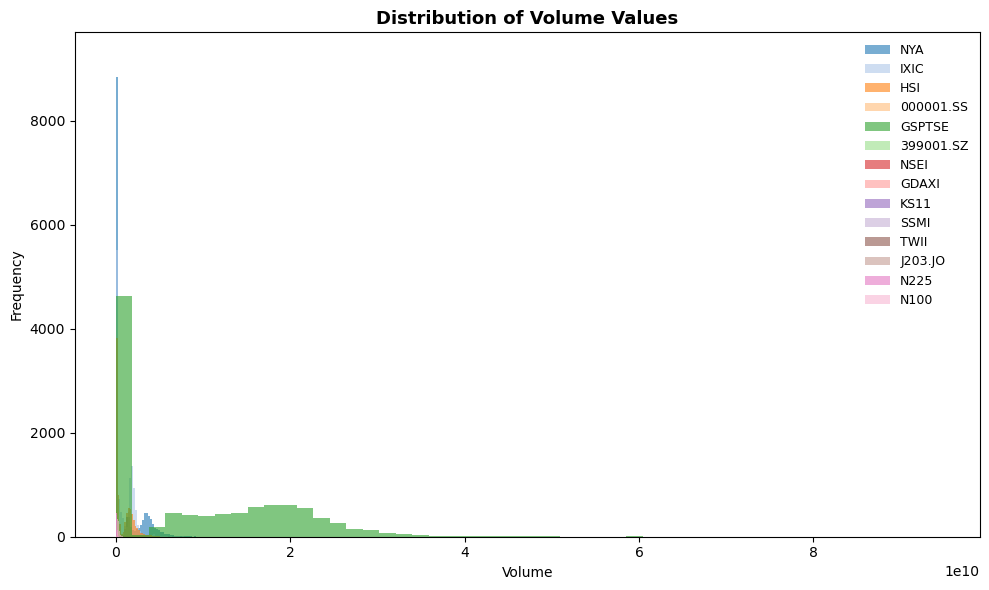

In [29]:
# Visualize Volume distribution separately
plt.figure(figsize=(10, 6))

# Plot Volume distribution for each index
for idx in unique_indices:
    subset = df[df[index_col] == idx]
    plt.hist(subset['Volume'].dropna(), bins=50, color=color_map[idx], alpha=0.6, label=idx)
plt.title('Distribution of Volume Values', fontsize=13, weight='bold')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend(loc='upper right', frameon=False, fontsize=9)
plt.tight_layout()
plt.show()

# Data Cleaning